In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import random
random.seed(0)

In [2]:
g = ig.Graph.Erdos_Renyi(n=15, m=30, directed=False, loops=False)
g.to_directed(mode="acyclic")

In [3]:
ig.summary(g)

IGRAPH D--- 15 30 -- 


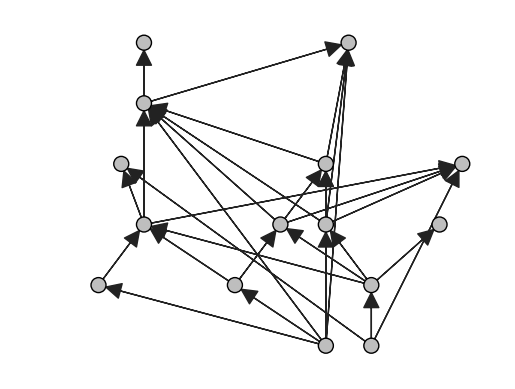

In [5]:
fig, ax = plt.subplots()
ig.plot(
  g,
  target=ax,
  layout="sugiyama",
  vertex_size=15,
  vertex_color="grey",
  edge_color="#222",
  edge_width=1,
)
plt.show()

In [ ]:
"""
Demo: You can render HTML in jupyter notebook.
"""
from IPython.display import display, HTML

myHTML = """
<div id="mydiv" style="padding: 20px; background: red;">
    <h1 id="theText">Red</h1>
    <button id="myButton">Click here</button>
</div>

<script>
    document.getElementById('myButton').onclick = function() {
        const mydiv = document.getElementById('mydiv');
        const theText = document.getElementById('theText');

        if (mydiv.style.background === 'blue') {
            theText.innerHTML = 'Red';
            mydiv.style.background = 'red';
        } else {
            theText.innerHTML = "Blue";
            mydiv.style.background = 'blue';
        }
    };
</script>
"""

display(HTML(myHTML))

In [82]:
layout = g.layout('sugiyama')

pointPositions = ', '.join([f"{t[0]}, {t[1]}" for t in layout])

print(pointPositions)

4.0, 0.0, 10.5, 0.0, 3.0, 0.0, 7.5, 1.0, 6.0, 1.0, 0.0, 2.0, 6.0, 2.0, 6.5, 3.0, 10.0, 3.0, 11.0, 4.0, 3.5, 4.0, 6.0, 5.0, 7.5, 6.0, 11.5, 2.0, 13.0, 5.0


In [81]:
edges = g.get_edgelist()

links = ', '.join([f"{e[0]}, {e[1]}" for e in edges])

print(links)

1, 3, 2, 4, 3, 5, 0, 6, 3, 6, 4, 6, 0, 7, 3, 7, 6, 7, 1, 8, 4, 8, 6, 8, 8, 9, 2, 10, 6, 10, 2, 11, 4, 11, 7, 11, 9, 11, 10, 11, 0, 12, 3, 12, 8, 12, 11, 12, 0, 13, 1, 13, 3, 13, 0, 14, 1, 14, 9, 14


In [ ]:
from IPython.display import display, HTML
import uuid


def draw_graph(graph: ig.Graph, layout: str = 'sugiyama'):

	# Get Graph attributes required for drawing
	pointPositions = ', '.join([f"{t[0]}, {t[1]}" for t in graph.layout(layout)])
	links = ', '.join([f"{e[0]}, {e[1]}" for e in graph.get_edgelist()])

	config = str({
		"spaceSize": 4096,
		"backgroundColor": '#2d313a',
		"pointDefaultColor": '#F069B4',
		"scalePointsOnZoom": str(True).lower(),
		"simulationFriction": 0.0, # Make stuff move
		"simulationGravity": 0,
		"simulationRepulsion": 0.5,
		"curvedLinks": str(True).lower(),
		"fitViewDelay": 500,
		"fitViewPadding": 0.3,
		"rescalePositions": str(True).lower(),
		"enableDrag": str(True).lower(),
		"attribution": 'Cosmograph'
	}).replace('\'true\'', 'true')

	# Like Key, required to reference div in this specific cell's output (might otherwise reference other cell's output)
	unique_id = "graph_" + str(uuid.uuid4()).replace("-", "")

	cosmo_html = """
	<div """ + f'id="{unique_id}"' + """ style="height: 500px; width: 100%; background: #2d313a;"></div>

	<script type="module">
		// Import Graph library from CDN
		import { Graph } from 'https://esm.sh/@cosmos.gl/graph';

		const container = document.getElementById('""" + f"{unique_id}" + """');

		const config = """ + config + """;
		const graph = new Graph(container, config);

		// Points: [x, y, x, y...]
		const pointPositions = new Float32Array([""" + pointPositions + """]);
		graph.setPointPositions(pointPositions);

		// Links: [source, target, source, target...]
		const links = new Float32Array(["""  + links + """]);
		graph.setLinks(links);

		graph.render();
	</script>
	"""

	display(HTML(cosmo_html))

	fig, ax = plt.subplots()
	ig.plot(
		graph,
		target=ax,
		backend="matplotlib",  # Uses same interface
		layout='sugiyama',
	)
	plt.show()

draw_graph(g, 'sugiyama')

In [152]:
import json 
def draw_graph(
	graph: ig.Graph,
	layout: str = 'sugiyama'
):
	"""
	@param graph: An Igraph Graph.

	@returns: nothing but plots the graph using IPython's display() function
	"""

	# Get Graph attributes required for drawing
	pointPositions = ', '.join([f"{t[0]}, {t[1]}" for t in graph.layout(layout)])
	links = ', '.join([f"{e[0]}, {e[1]}" for e in graph.get_edgelist()])

  	# Define config outside the HTML, opening up potential for configuration later on.
	config = json.dumps({
		"spaceSize": 4096,
		"backgroundColor": '#2d313a',
		"pointDefaultColor": '#F069B4',
		"scalePointsOnZoom": True,
		"simulationFriction": 0.0, # Make stuff move
		"simulationGravity": 0,
		"simulationRepulsion": 0.5,
		"curvedLinks": True,
		"fitViewDelay": 500,
		"fitViewPadding": 0.3,
		"rescalePositions": True,
		"enableDrag": True,
		"attribution": 'Cosmograph'
	})

	# Like Key, required to reference div in this specific cell's output (might otherwise reference other cell's output)
	unique_id = "graph_" + str(uuid.uuid4()).replace("-", "")

	cosmo_html = """
	<div id="{unique_id}" style="height: 500px; width: 100%; background: #2d313a;"></div>

	<script type="module">
		import {{ Graph }} from 'https://esm.sh/@cosmos.gl/graph';

		const container = document.getElementById('{unique_id}');
		const config = {config_json};
		const graph = new Graph(container, config);

		const pointPositions = new Float32Array([{pointPositions}]);
		graph.setPointPositions(pointPositions);

		const links = new Float32Array([{links}]);
		graph.setLinks(links);

		graph.render();
	</script>
	""".format(
		unique_id=unique_id,
		config_json=config,
		pointPositions=pointPositions,
		links=links
	)

	display(HTML(cosmo_html))
draw_graph(g)